# Assignment 4

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

This assignment requires that you to find **at least** two datasets on the web which are related, and that you visualize these datasets to answer a question with the broad topic of **sports or athletics** (see below) for the region of **San Jose, California, United States**, or **United States** more broadly.

You can merge these datasets with data from different regions if you like! For instance, you might want to compare **San Jose, California, United States** to Ann Arbor, USA. In that case at least one source file must be about **San Jose, California, United States**.

You are welcome to choose datasets at your discretion, but keep in mind **they will be shared with your peers**, so choose appropriate datasets. Sensitive, confidential, illicit, and proprietary materials are not good choices for datasets for this assignment. You are welcome to upload datasets of your own as well, and link to them using a third party repository such as github, bitbucket, pastebin, etc. Please be aware of the Coursera terms of service with respect to intellectual property.

Also, you are welcome to preserve data in its original language, but for the purposes of grading you should provide english translations. You are welcome to provide multiple visuals in different languages if you would like!

As this assignment is for the whole course, you must incorporate principles discussed in the first week, such as having as high data-ink ratio (Tufte) and aligning with Cairo’s principles of truth, beauty, function, and insight.

Here are the assignment instructions:

 * State the region and the domain category that your data sets are about (e.g., **San Jose, California, United States** and **sports or athletics**).
 * You must state a question about the domain category and region that you identified as being interesting.
 * You must provide at least two links to available datasets. These could be links to files such as CSV or Excel files, or links to websites which might have data in tabular form, such as Wikipedia pages.
 * You must upload an image which addresses the research question you stated. In addition to addressing the question, this visual should follow Cairo's principles of truthfulness, functionality, beauty, and insightfulness.
 * You must contribute a short (1-2 paragraph) written justification of how your visualization addresses your stated research question.

What do we mean by **sports or athletics**?  For this category we are interested in sporting events or athletics broadly, please feel free to creatively interpret the category when building your research question!

## Tips
* Wikipedia is an excellent source of data, and I strongly encourage you to explore it for new data sources.
* Many governments run open data initiatives at the city, region, and country levels, and these are wonderful resources for localized data sources.
* Several international agencies, such as the [United Nations](http://data.un.org/), the [World Bank](http://data.worldbank.org/), the [Global Open Data Index](http://index.okfn.org/place/) are other great places to look for data.
* This assignment requires you to convert and clean datafiles. Check out the discussion forums for tips on how to do this from various sources, and share your successes with your fellow students!

## Example
Looking for an example? Here's what our course assistant put together for the **Ann Arbor, MI, USA** area using **sports and athletics** as the topic. [Example Solution File](Assignment4_example.pdf)

https://www.baseball1stats.com/Teams/?p_NL_teamID=LAN&p_NL_franchID=LAD

https://www.baseball1stats.com/Teams/?p_NL_teamID=SFN&p_NL_franchID=SFG


In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib notebook

plt.style.available
# use the 'seaborn-colorblind' style
plt.style.use('seaborn')

In [13]:
#url_lad = 'https://github.com/Bill-Fujimoto/Applied-Data-Science-Applied-Plotting/blob/master/Week%204/LAD_1958-2017.csv'
#url_sfg = 'https://github.com/Bill-Fujimoto/Applied-Data-Science-Applied-Plotting/blob/master/Week%204/SFG_1958-2017.csv'
#lad_csv = urllib.request.urlopen(url_lad)
#sfg_csv = urllib.request.urlopen(url_sfg)
lad = pd.read_csv('LAD_1958-2017.csv')
sfg = pd.read_csv('SFG_1958-2017.csv')

#lad.head()

In [14]:
# Add Win ratio column
lad['W%']= lad['W']/lad['G']
sfg['W%']= sfg['W']/sfg['G']

# Add team ID column
lad['ID']= 'Dodgers'
sfg['ID']= 'Giants'

In [15]:
# Columns to keep and reorder
col=['ID', 'Year', 'Rank', 'G', 'W', 'W%', 'LGWin', 'WSWin', 'R', 'AB', 'H', '2B', '3B', 'HR',
 'BB', 'SO', 'SB', 'HBP', 'RA', 'ER', 'ERA', 'CG', 'SHO', 'SV', 'IP', 'HA', 'HRA', 'BBA', 'SOA',
 'E', 'DP', 'FP']

lad = lad[col]
sfg = sfg[col]
sfg.head()

,ID,Year,Rank,G,W,W%,LGWin,WSWin,R,AB,...,SHO,SV,IP,HA,HRA,BBA,SOA,E,DP,FP
0,Giants,2017,5,162,64,0.395062,N,N,639,5551,...,5,32,4356,1515,182,496,1234,87,127,0.985
1,Giants,2016,2,162,87,0.537037,N,N,715,5565,...,11,43,4381,1334,158,439,1309,72,136,0.988
2,Giants,2015,2,162,84,0.518519,N,N,696,5565,...,18,41,4333,1344,155,431,1165,78,145,0.987
3,Giants,2014,2,162,88,0.543210,Y,Y,665,5523,...,12,46,4347,1305,133,389,1211,100,155,0.984
4,Giants,2013,4,162,76,0.469136,N,N,629,5552,...,13,41,4342,1380,145,521,1256,107,128,0.982


<IPython.core.display.Javascript object>


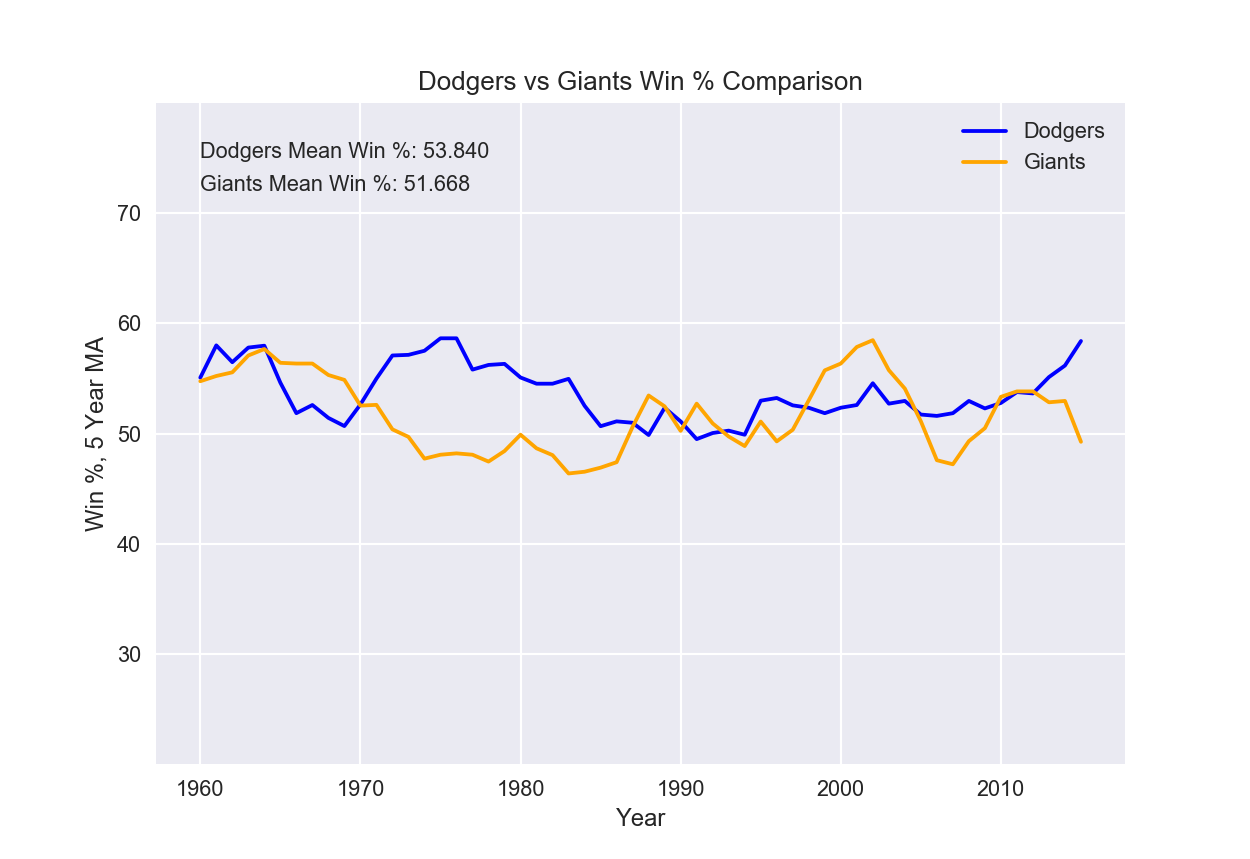

In [25]:
# Compare season win percentage, 5 year Moving Avg.
ma_lad = np.convolve(lad['W%'], [1. / 5] * 5, 'valid')*100
ma_sfg = np.convolve(sfg['W%'], [1. / 5] * 5, 'valid')*100

plt.figure()
plt.plot(lad['Year'][2:-2], ma_lad, color='blue', label='Dodgers')
plt.plot(sfg['Year'][2:-2], ma_sfg, color='orange', label='Giants')
plt.legend()

ax = plt.gca()
ax.set_xlabel('Year')
ax.set_ylabel('Win %, 5 Year MA')
ax.set_ylim(20,80)
ax.set_yticks(list(range(30,80,10)))
ax.set_title('Dodgers vs Giants Win % Comparison')

xticloc = ax.xaxis.get_majorticklocs()
lad_mean = '{:.3f}'.format(lad['W%'].mean()*100)
sfg_mean = '{:.3f}'.format(sfg['W%'].mean()*100)
plt.annotate(f'Dodgers Mean Win %: {lad_mean}', [xticloc[1], 75])
plt.annotate(f'Giants Mean Win %: {sfg_mean}', [xticloc[1], 72])

plt.savefig('Dodgers vs Giants Win % Comparison.png', padd_inches=0.5, bbox_inches='tight');

<IPython.core.display.Javascript object>


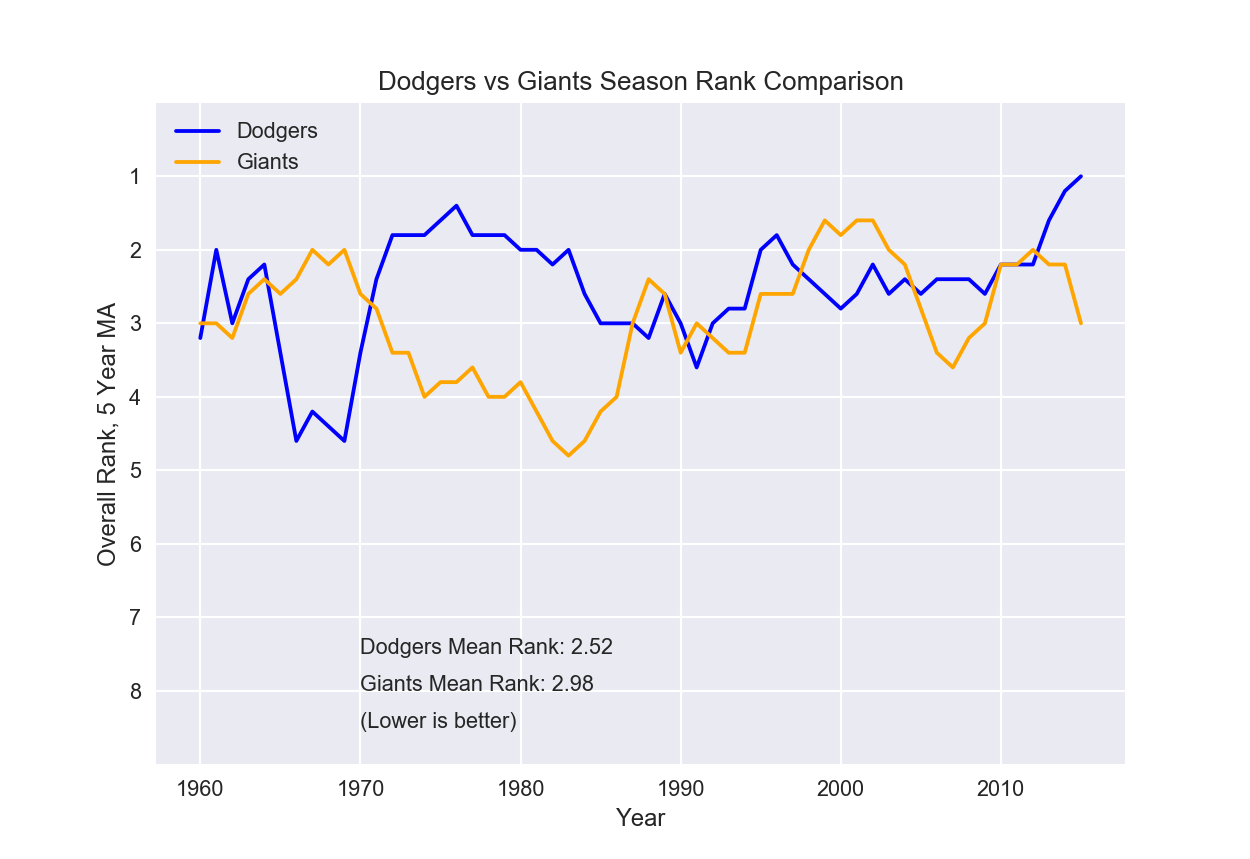

In [12]:
# Compare season ending rank, 5 year Moving Avg.
ma_lad = np.convolve(lad['Rank'], [1. / 5] * 5, 'valid')
ma_sfg = np.convolve(sfg['Rank'], [1. / 5] * 5, 'valid')

plt.figure()
plt.plot(lad['Year'][2:-2], ma_lad, color='blue', label='Dodgers')
plt.plot(sfg['Year'][2:-2], ma_sfg, color='orange', label='Giants')
plt.legend()

ax = plt.gca()
ax.set_xlabel('Year')
ax.set_ylabel('Overall Rank, 5 Year MA')
ax.set_ylim(9, 0)
ax.set_yticks(list(range(1,9)))
ax.set_title('Dodgers vs Giants Season Rank Comparison')

xticloc = ax.xaxis.get_majorticklocs()
lad_mean = '{:.2f}'.format(lad['Rank'].mean())
sfg_mean = '{:.2f}'.format(sfg['Rank'].mean())
plt.annotate(f'(Lower is better)', [xticloc[2], 8.5])
plt.annotate(f'Dodgers Mean Rank: {lad_mean}', [xticloc[2], 7.5])
plt.annotate(f'Giants Mean Rank: {sfg_mean}', [xticloc[2], 8])

plt.savefig('Dodgers vs Giants Season Rank Comparison.png', padd_inches=0.5, bbox_inches='tight');

<IPython.core.display.Javascript object>


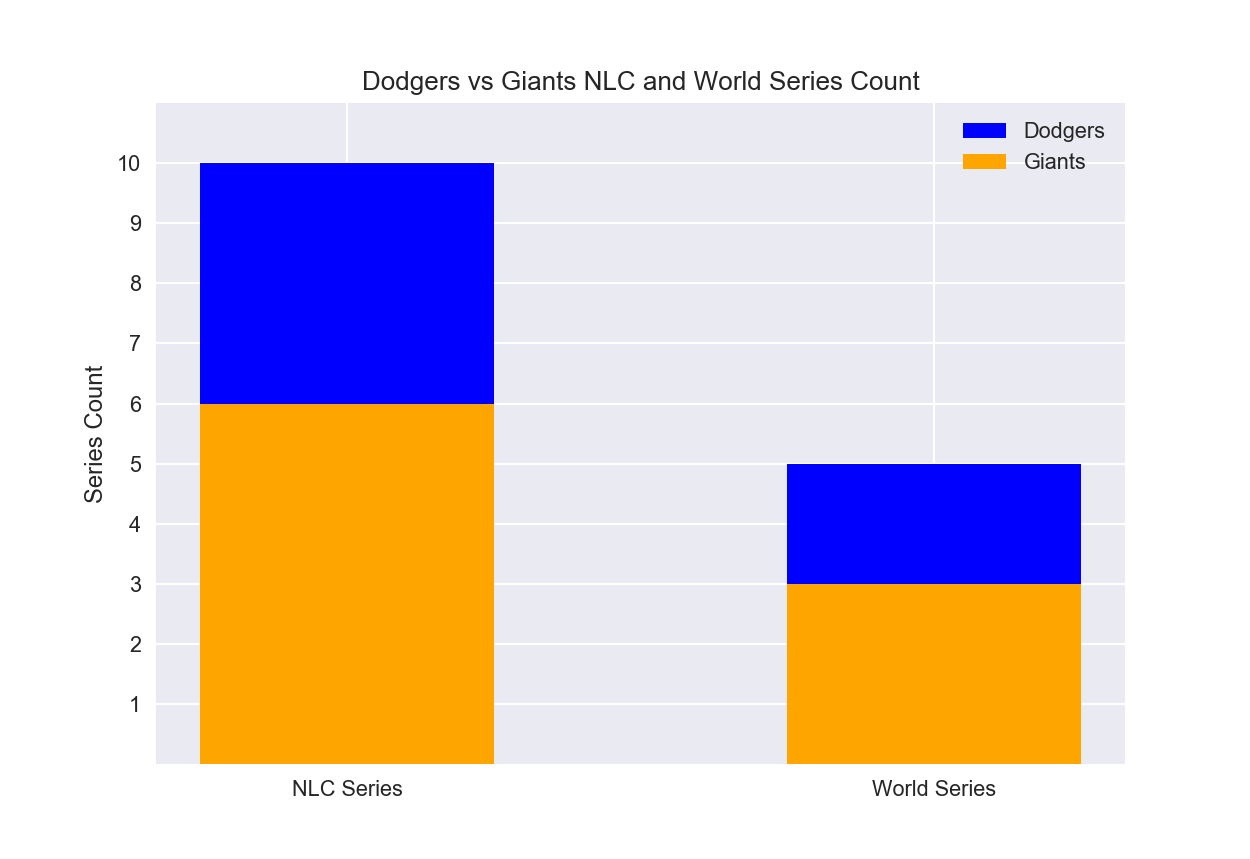

In [13]:
plt.figure()

lad_lgwin = lad.loc[lad['LGWin']== 'Y', 'LGWin'].count()
lad_wswin = lad.loc[lad['WSWin']== 'Y', 'WSWin'].count()
sfg_lgwin = sfg.loc[sfg['LGWin']== 'Y', 'LGWin'].count()
sfg_wswin = sfg.loc[sfg['WSWin']== 'Y', 'WSWin'].count()

plt.bar('NLC Series', lad_lgwin, width=.5, color='blue', label = 'Dodgers')
plt.bar('NLC Series', sfg_lgwin, width=.5, color='orange', label = 'Giants')
plt.bar('World Series', lad_wswin, width=.5, color='blue')
plt.bar('World Series',sfg_wswin, width=.5, color='orange')
plt.legend()

ax = plt.gca()
ax.set_ylabel('Series Count')
ax.set_ylim(0, 11)
ax.set_yticks(list(range(1,11)))
ax.set_title('Dodgers vs Giants NLC and World Series Count');

plt.savefig('Dodgers vs Giants NLC and World Series Count.png', padd_inches=0.5, bbox_inches='tight');

<IPython.core.display.Javascript object>


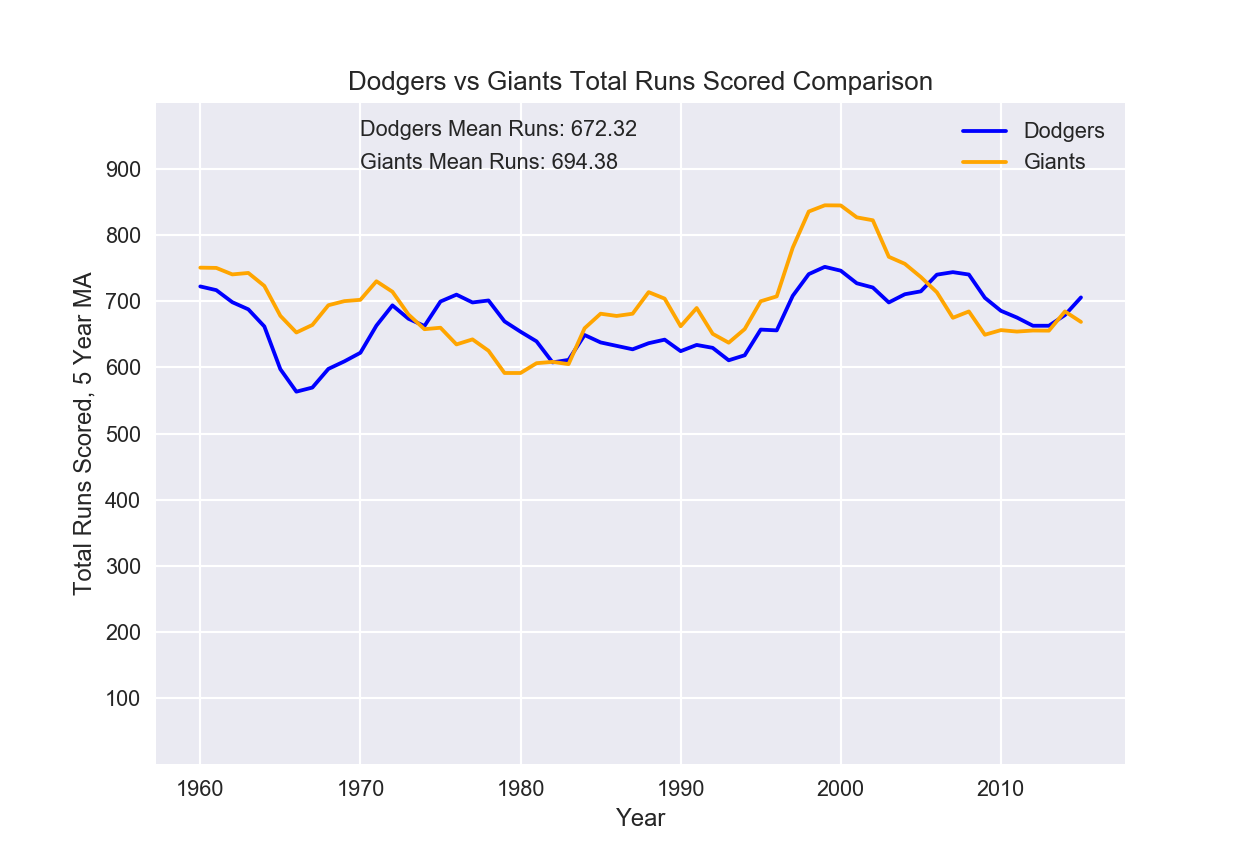

In [14]:
# Compare season runs scored, 5 year Moving Avg.
ma_lad = np.convolve(lad['R'], [1. / 5] * 5, 'valid')
ma_sfg = np.convolve(sfg['R'], [1. / 5] * 5, 'valid')

plt.figure()
plt.plot(lad['Year'][2:-2], ma_lad, color='blue', label='Dodgers')
plt.plot(sfg['Year'][2:-2], ma_sfg, color='orange', label='Giants')
plt.legend()

ax = plt.gca()
ax.set_xlabel('Year')
ax.set_ylabel('Total Runs Scored, 5 Year MA')
ax.set_ylim(0, 1000)
ax.set_yticks(list(range(100,1000,100)))
ax.set_title('Dodgers vs Giants Total Runs Scored Comparison')

xticloc = ax.xaxis.get_majorticklocs()
lad_mean = '{:.2f}'.format(lad['R'].mean())
sfg_mean = '{:.2f}'.format(sfg['R'].mean())
plt.annotate(f'Dodgers Mean Runs: {lad_mean}', [xticloc[2], 950])
plt.annotate(f'Giants Mean Runs: {sfg_mean}', [xticloc[2], 900])

plt.savefig('Dodgers vs Giants Total Runs Scored Comparison.png', padd_inches=0.5, bbox_inches='tight');

<IPython.core.display.Javascript object>


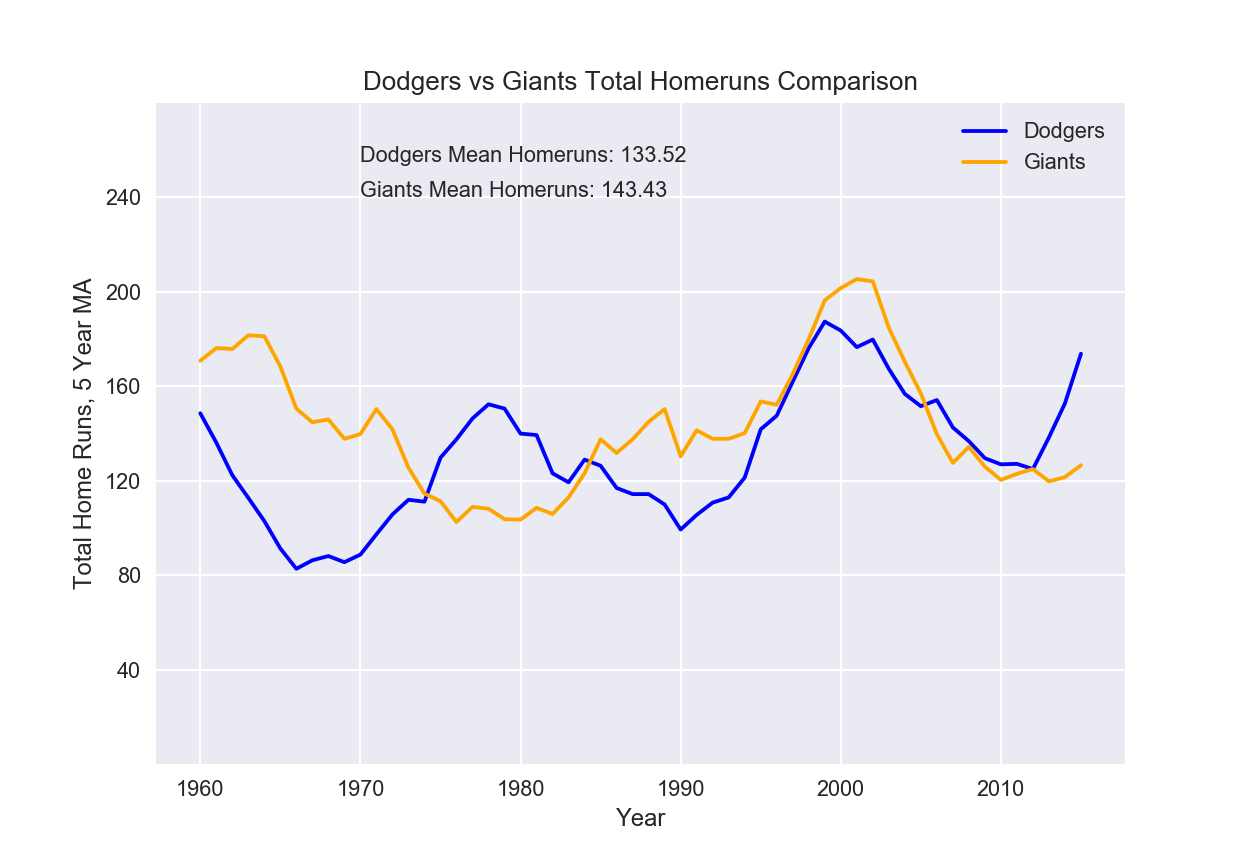

In [15]:
# Compare season home runs, 5 year Moving Avg.
ma_lad = np.convolve(lad['HR'], [1. / 5] * 5, 'valid')
ma_sfg = np.convolve(sfg['HR'], [1. / 5] * 5, 'valid')

plt.figure()
plt.plot(lad['Year'][2:-2], ma_lad, color='blue', label='Dodgers')
plt.plot(sfg['Year'][2:-2], ma_sfg, color='orange', label='Giants')
plt.legend()

ax = plt.gca()
ax.set_xlabel('Year')
ax.set_ylabel('Total Home Runs, 5 Year MA')
ax.set_ylim(0, 280)
ax.set_yticks(list(range(40,280,40)))
ax.set_title('Dodgers vs Giants Total Homeruns Comparison')

xticloc = ax.xaxis.get_majorticklocs()
lad_mean = '{:.2f}'.format(lad['HR'].mean())
sfg_mean = '{:.2f}'.format(sfg['HR'].mean())
plt.annotate(f'Dodgers Mean Homeruns: {lad_mean}', [xticloc[2], 255])
plt.annotate(f'Giants Mean Homeruns: {sfg_mean}', [xticloc[2], 240])

plt.savefig('Dodgers vs Giants Total Homeruns Comparison.png', padd_inches=0.5, bbox_inches='tight');

<IPython.core.display.Javascript object>


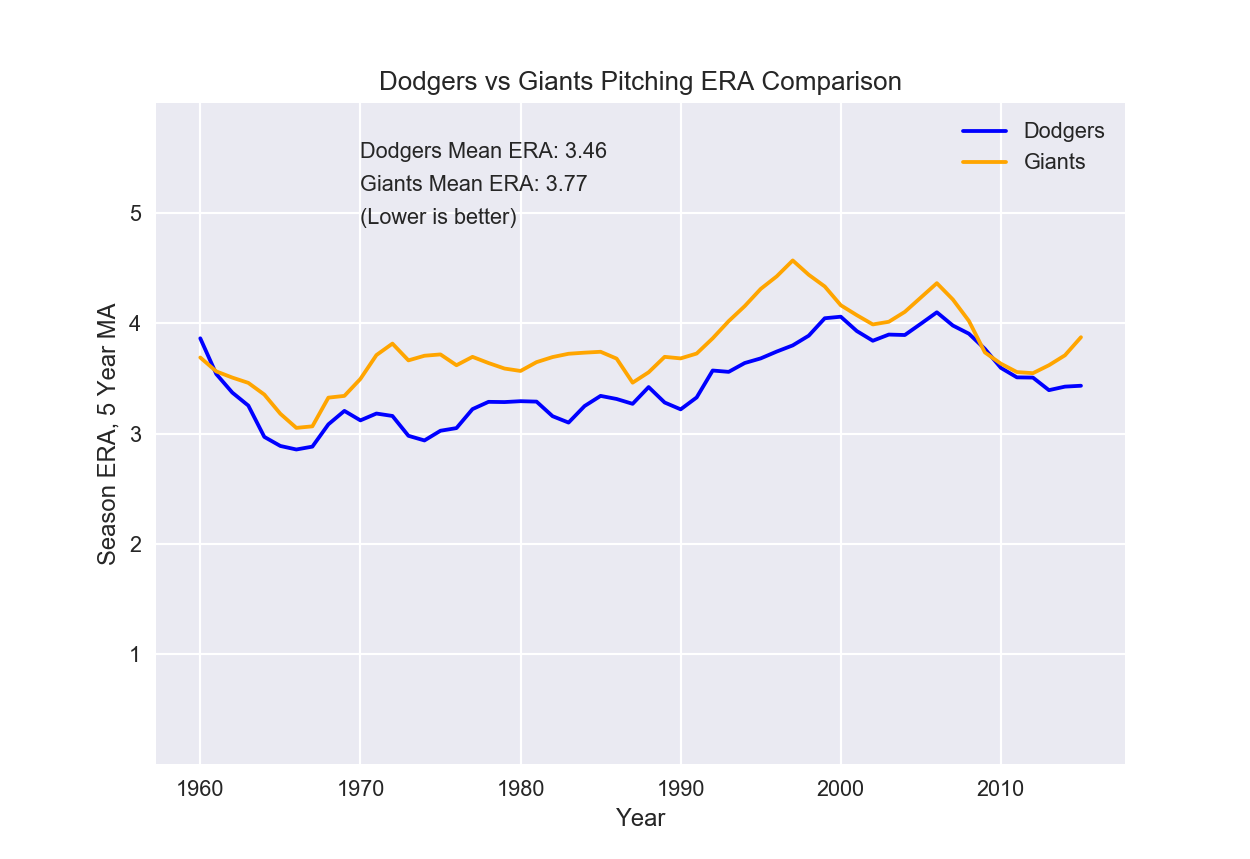

In [16]:
# Compare season ERA, 5 year Moving Avg.
ma_lad = np.convolve(lad['ERA'], [1. / 5] * 5, 'valid')
ma_sfg = np.convolve(sfg['ERA'], [1. / 5] * 5, 'valid')

plt.figure()
plt.plot(lad['Year'][2:-2], ma_lad, color='blue', label='Dodgers')
plt.plot(sfg['Year'][2:-2], ma_sfg, color='orange', label='Giants')
plt.legend()

ax = plt.gca()
ax.set_xlabel('Year')
ax.set_ylabel('Season ERA, 5 Year MA')
ax.set_ylim(0, 6)
ax.set_yticks(list(range(1,6)))
ax.set_title('Dodgers vs Giants Pitching ERA Comparison')

xticloc = ax.xaxis.get_majorticklocs()
lad_mean = '{:.2f}'.format(lad['ERA'].mean())
sfg_mean = '{:.2f}'.format(sfg['ERA'].mean())
plt.annotate(f'Dodgers Mean ERA: {lad_mean}', [xticloc[2], 5.5])
plt.annotate(f'Giants Mean ERA: {sfg_mean}', [xticloc[2], 5.20])
plt.annotate(f'(Lower is better)', [xticloc[2], 4.9])

plt.savefig('Dodgers vs Giants Pitching ERA Comparison.png', padd_inches=0.5, bbox_inches='tight');

<IPython.core.display.Javascript object>


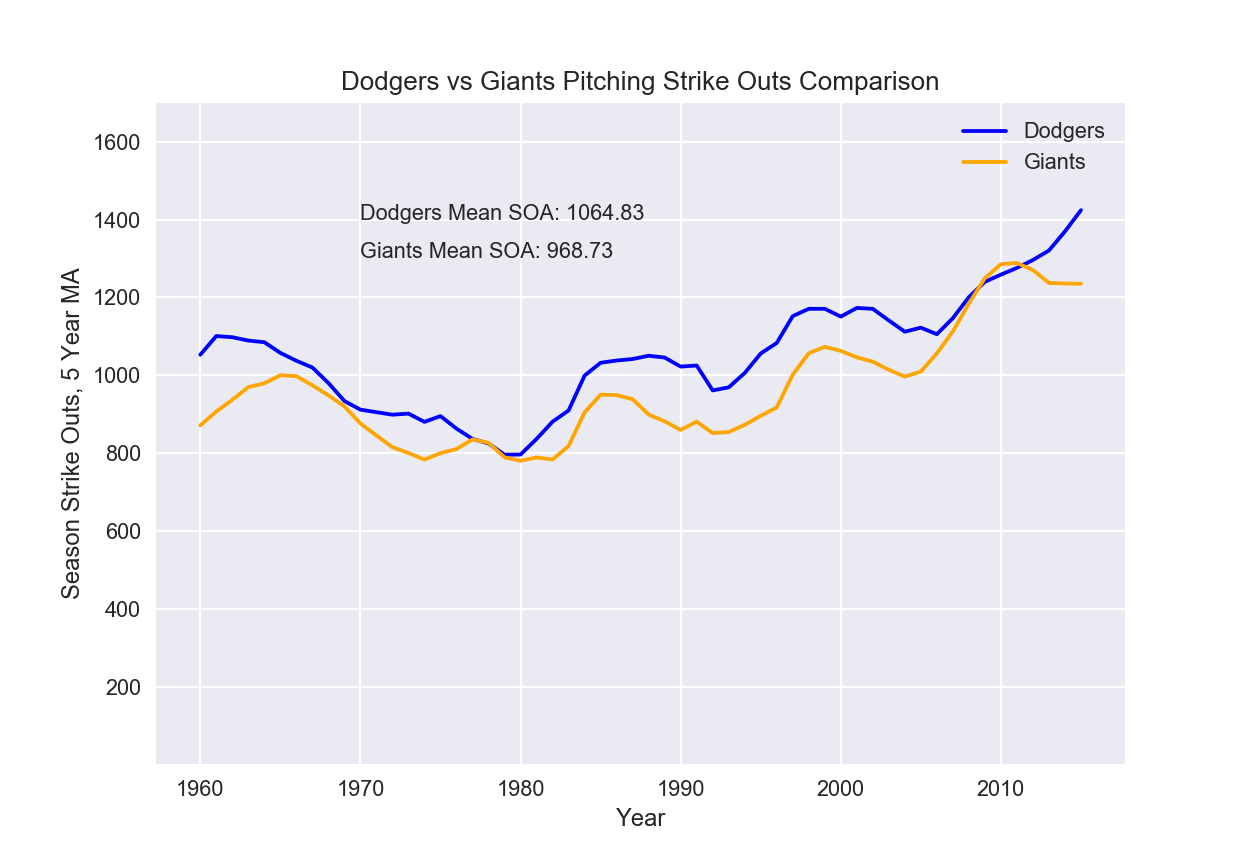

In [17]:
# Compare season strike outs allowed, 5 year Moving Avg.
ma_lad = np.convolve(lad['SOA'], [1. / 5] * 5, 'valid')
ma_sfg = np.convolve(sfg['SOA'], [1. / 5] * 5, 'valid')

plt.figure()
plt.plot(lad['Year'][2:-2], ma_lad, color='blue', label='Dodgers')
plt.plot(sfg['Year'][2:-2], ma_sfg, color='orange', label='Giants')
plt.legend()

ax = plt.gca()
ax.set_xlabel('Year')
ax.set_ylabel('Season Strike Outs, 5 Year MA')
ax.set_ylim(0, 1700)
ax.set_yticks(list(range(200,1700,200)))
ax.set_title('Dodgers vs Giants Pitching Strike Outs Comparison')

xticloc = ax.xaxis.get_majorticklocs()
lad_mean = '{:.2f}'.format(lad['SOA'].mean())
sfg_mean = '{:.2f}'.format(sfg['SOA'].mean())
plt.annotate(f'Dodgers Mean SOA: {lad_mean}', [xticloc[2], 1400])
plt.annotate(f'Giants Mean SOA: {sfg_mean}', [xticloc[2], 1300])

plt.savefig('Dodgers vs Giants Pitching Strike Outs Comparison.png', padd_inches=0.5, bbox_inches='tight');

<IPython.core.display.Javascript object>


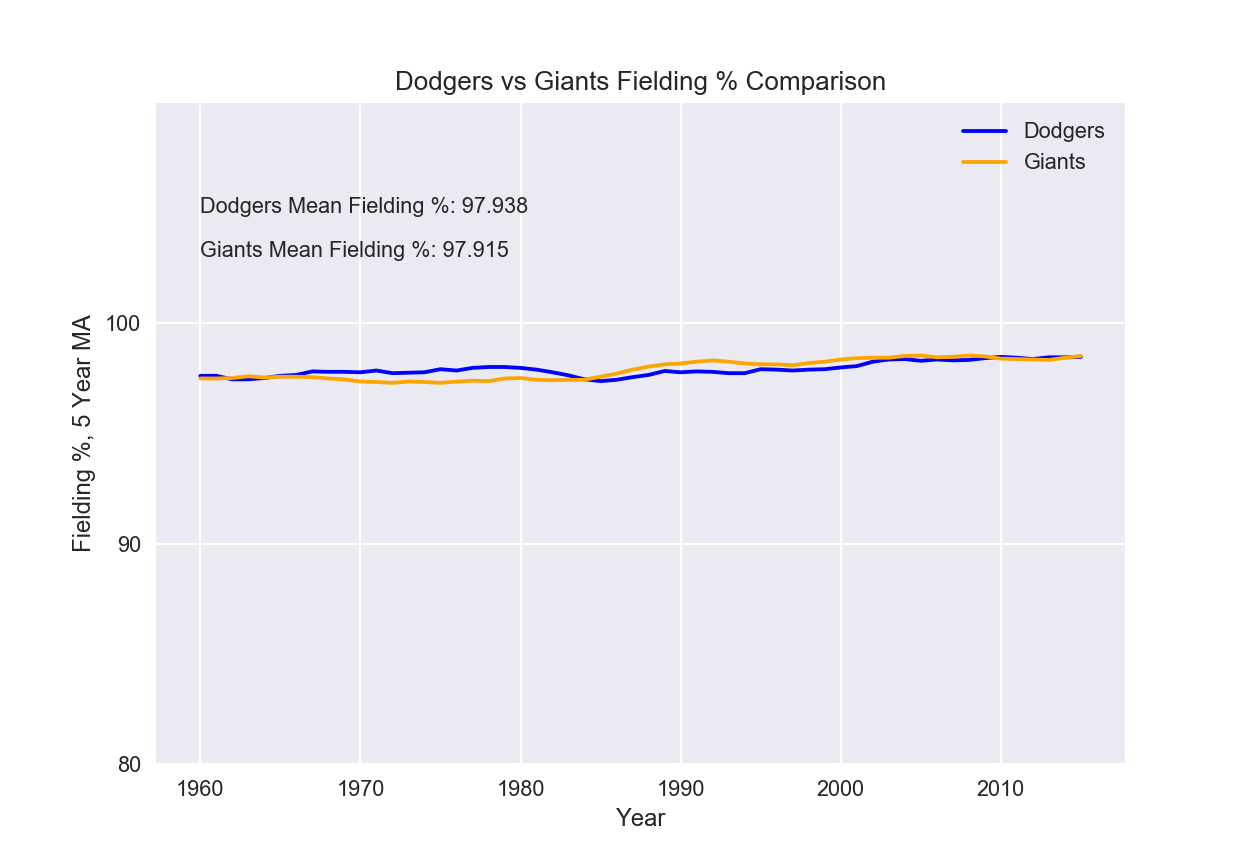

In [18]:
# Compare season fielding percentage, 5 year Moving Avg.
ma_lad = np.convolve(lad['FP'], [1. / 5] * 5, 'valid')*100
ma_sfg = np.convolve(sfg['FP'], [1. / 5] * 5, 'valid')*100

plt.figure()
plt.plot(lad['Year'][2:-2], ma_lad, color='blue', label='Dodgers')
plt.plot(sfg['Year'][2:-2], ma_sfg, color='orange', label='Giants')
plt.legend()

ax = plt.gca()
ax.set_xlabel('Year')
ax.set_ylabel('Fielding %, 5 Year MA')
ax.set_ylim(80,110)
ax.set_yticks(list(range(80,110,10)))
ax.set_title('Dodgers vs Giants Fielding % Comparison')

xticloc = ax.xaxis.get_majorticklocs()
lad_mean = '{:.3f}'.format(lad['FP'].mean()*100)
sfg_mean = '{:.3f}'.format(sfg['FP'].mean()*100)
plt.annotate(f'Dodgers Mean Fielding %: {lad_mean}', [xticloc[1], 105])
plt.annotate(f'Giants Mean Fielding %: {sfg_mean}', [xticloc[1], 103])

plt.savefig('Dodgers vs Giants Fielding % Comparison.png', padd_inches=0.5, bbox_inches='tight');

<IPython.core.display.Javascript object>


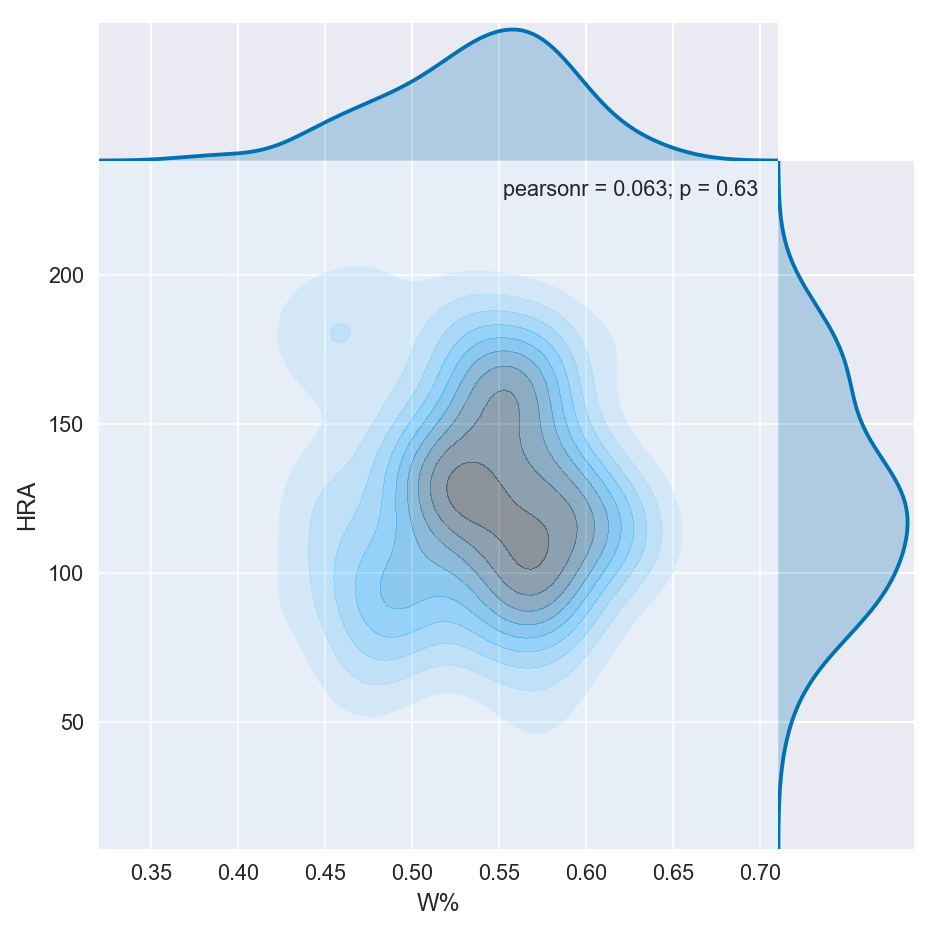

In [19]:
sns.jointplot(lad['W%'], lad['HRA'], kind='kde', alpha=0.4, space=0);


<IPython.core.display.Javascript object>


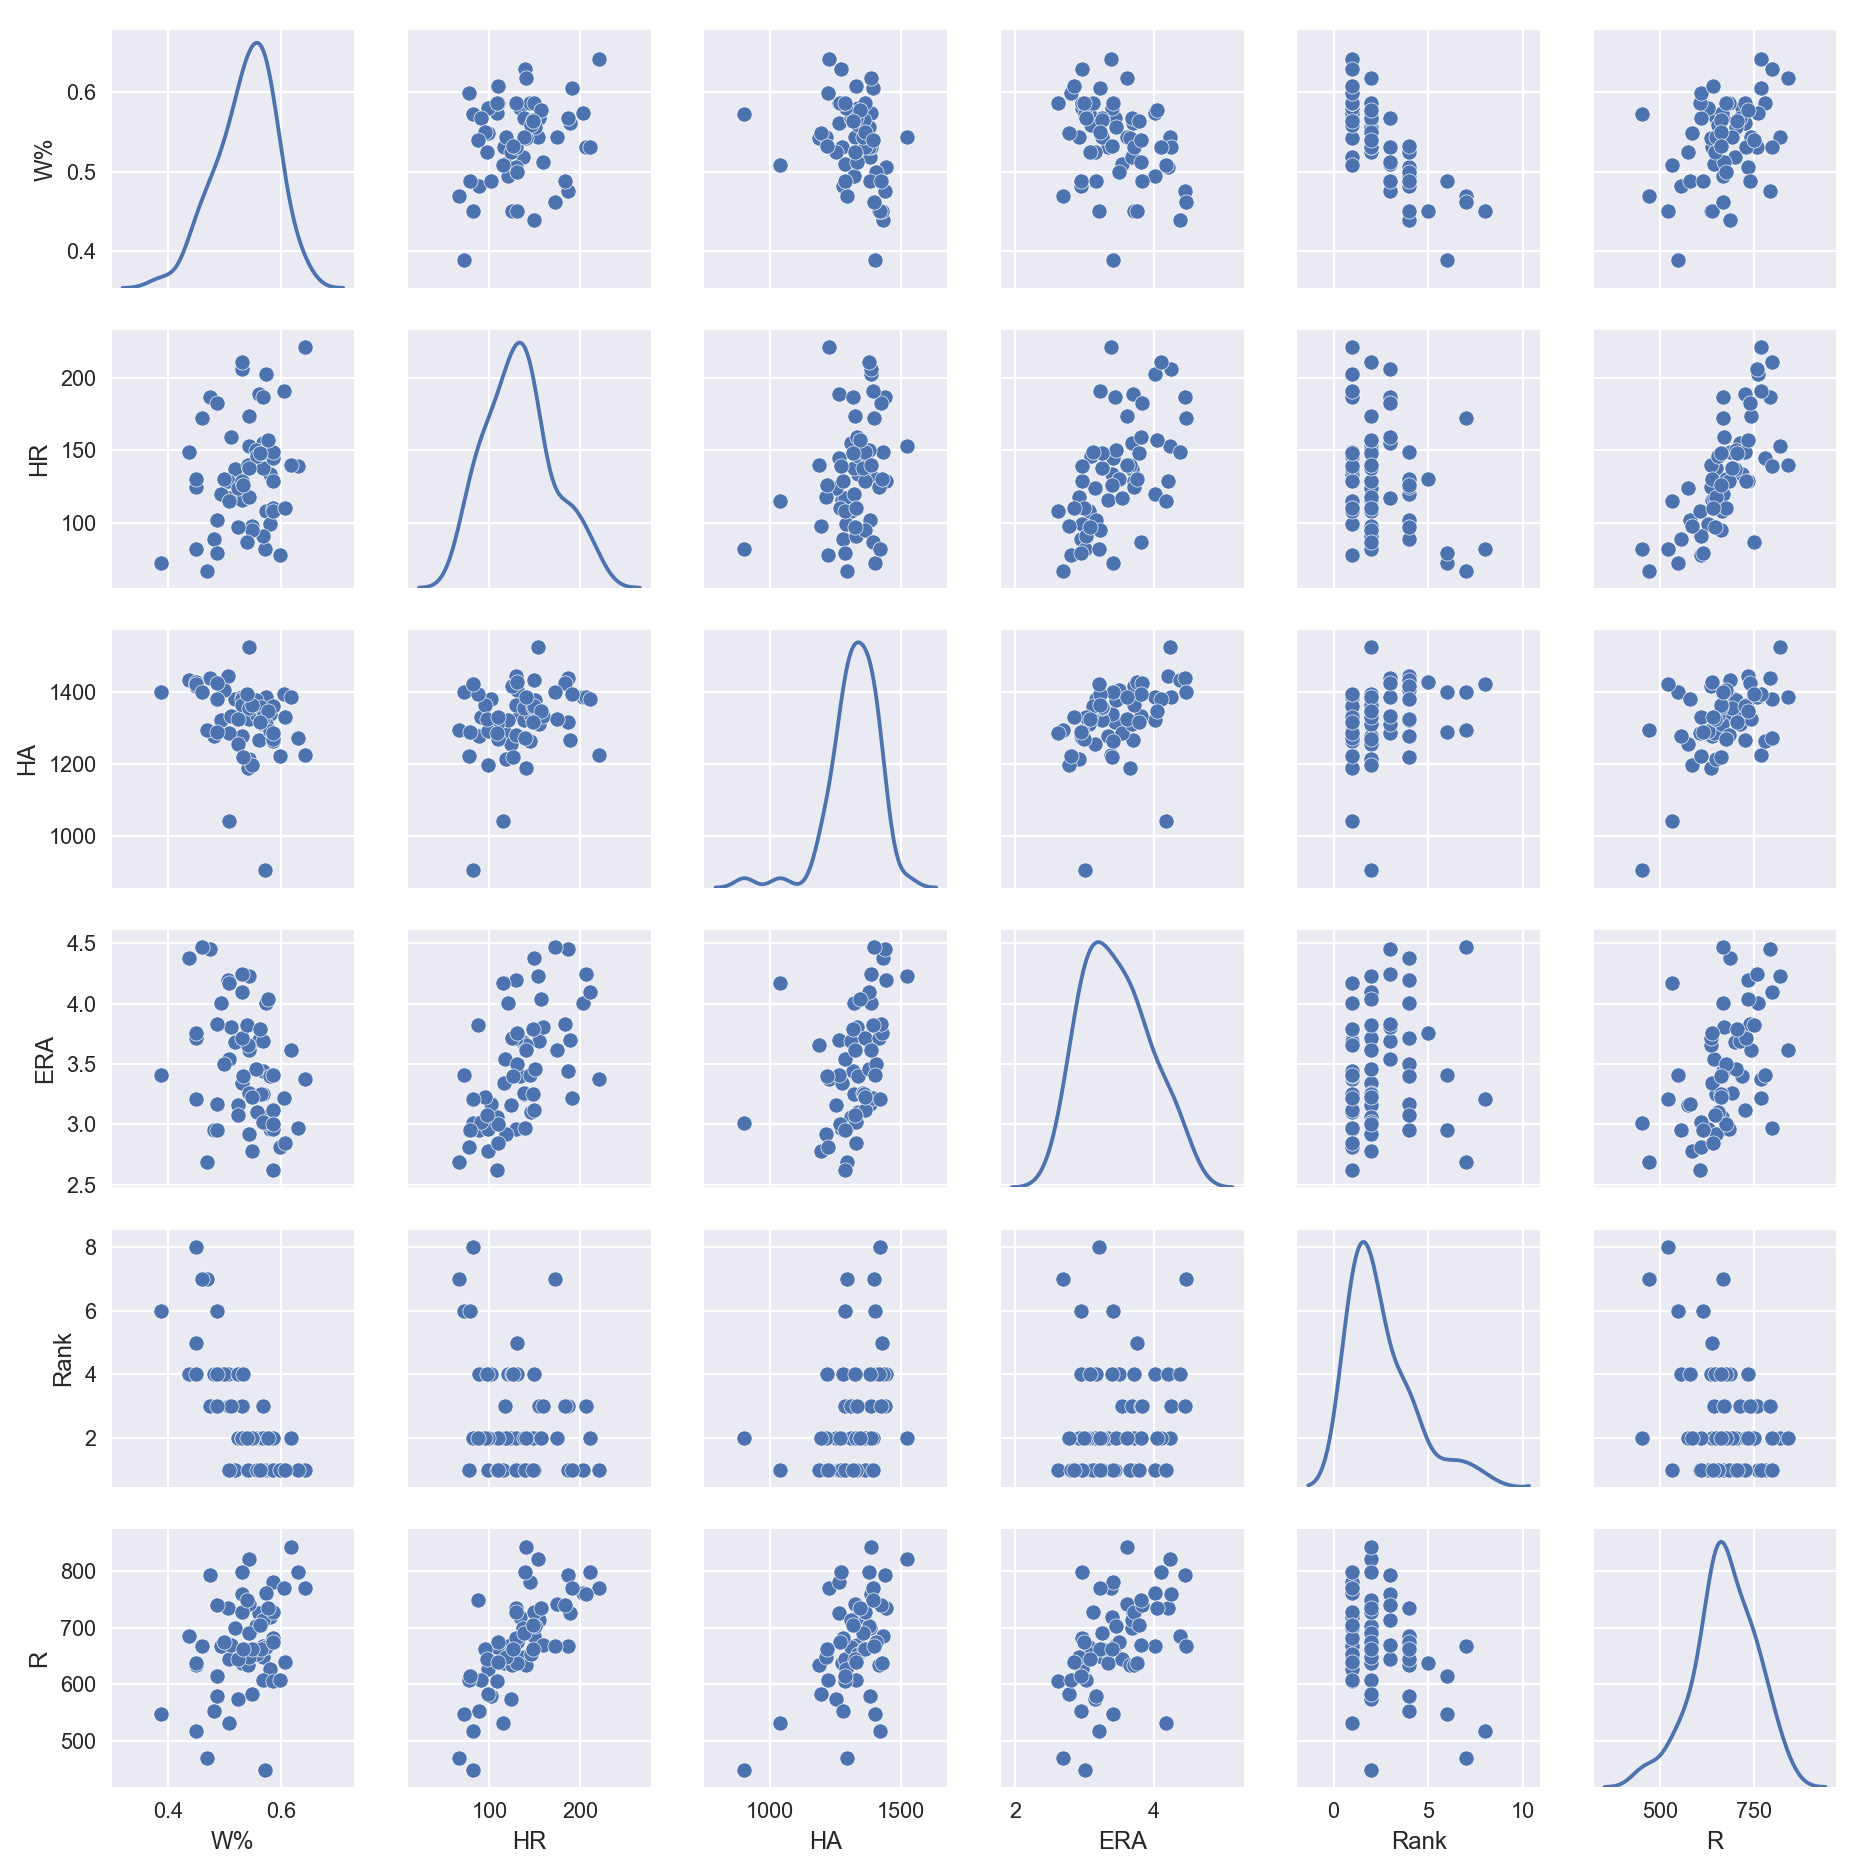

In [548]:
sns.pairplot(lad, vars=['W%', 'HR', 'HA','ERA', 'Rank', 'R'], diag_kind='kde', size=2);

<IPython.core.display.Javascript object>


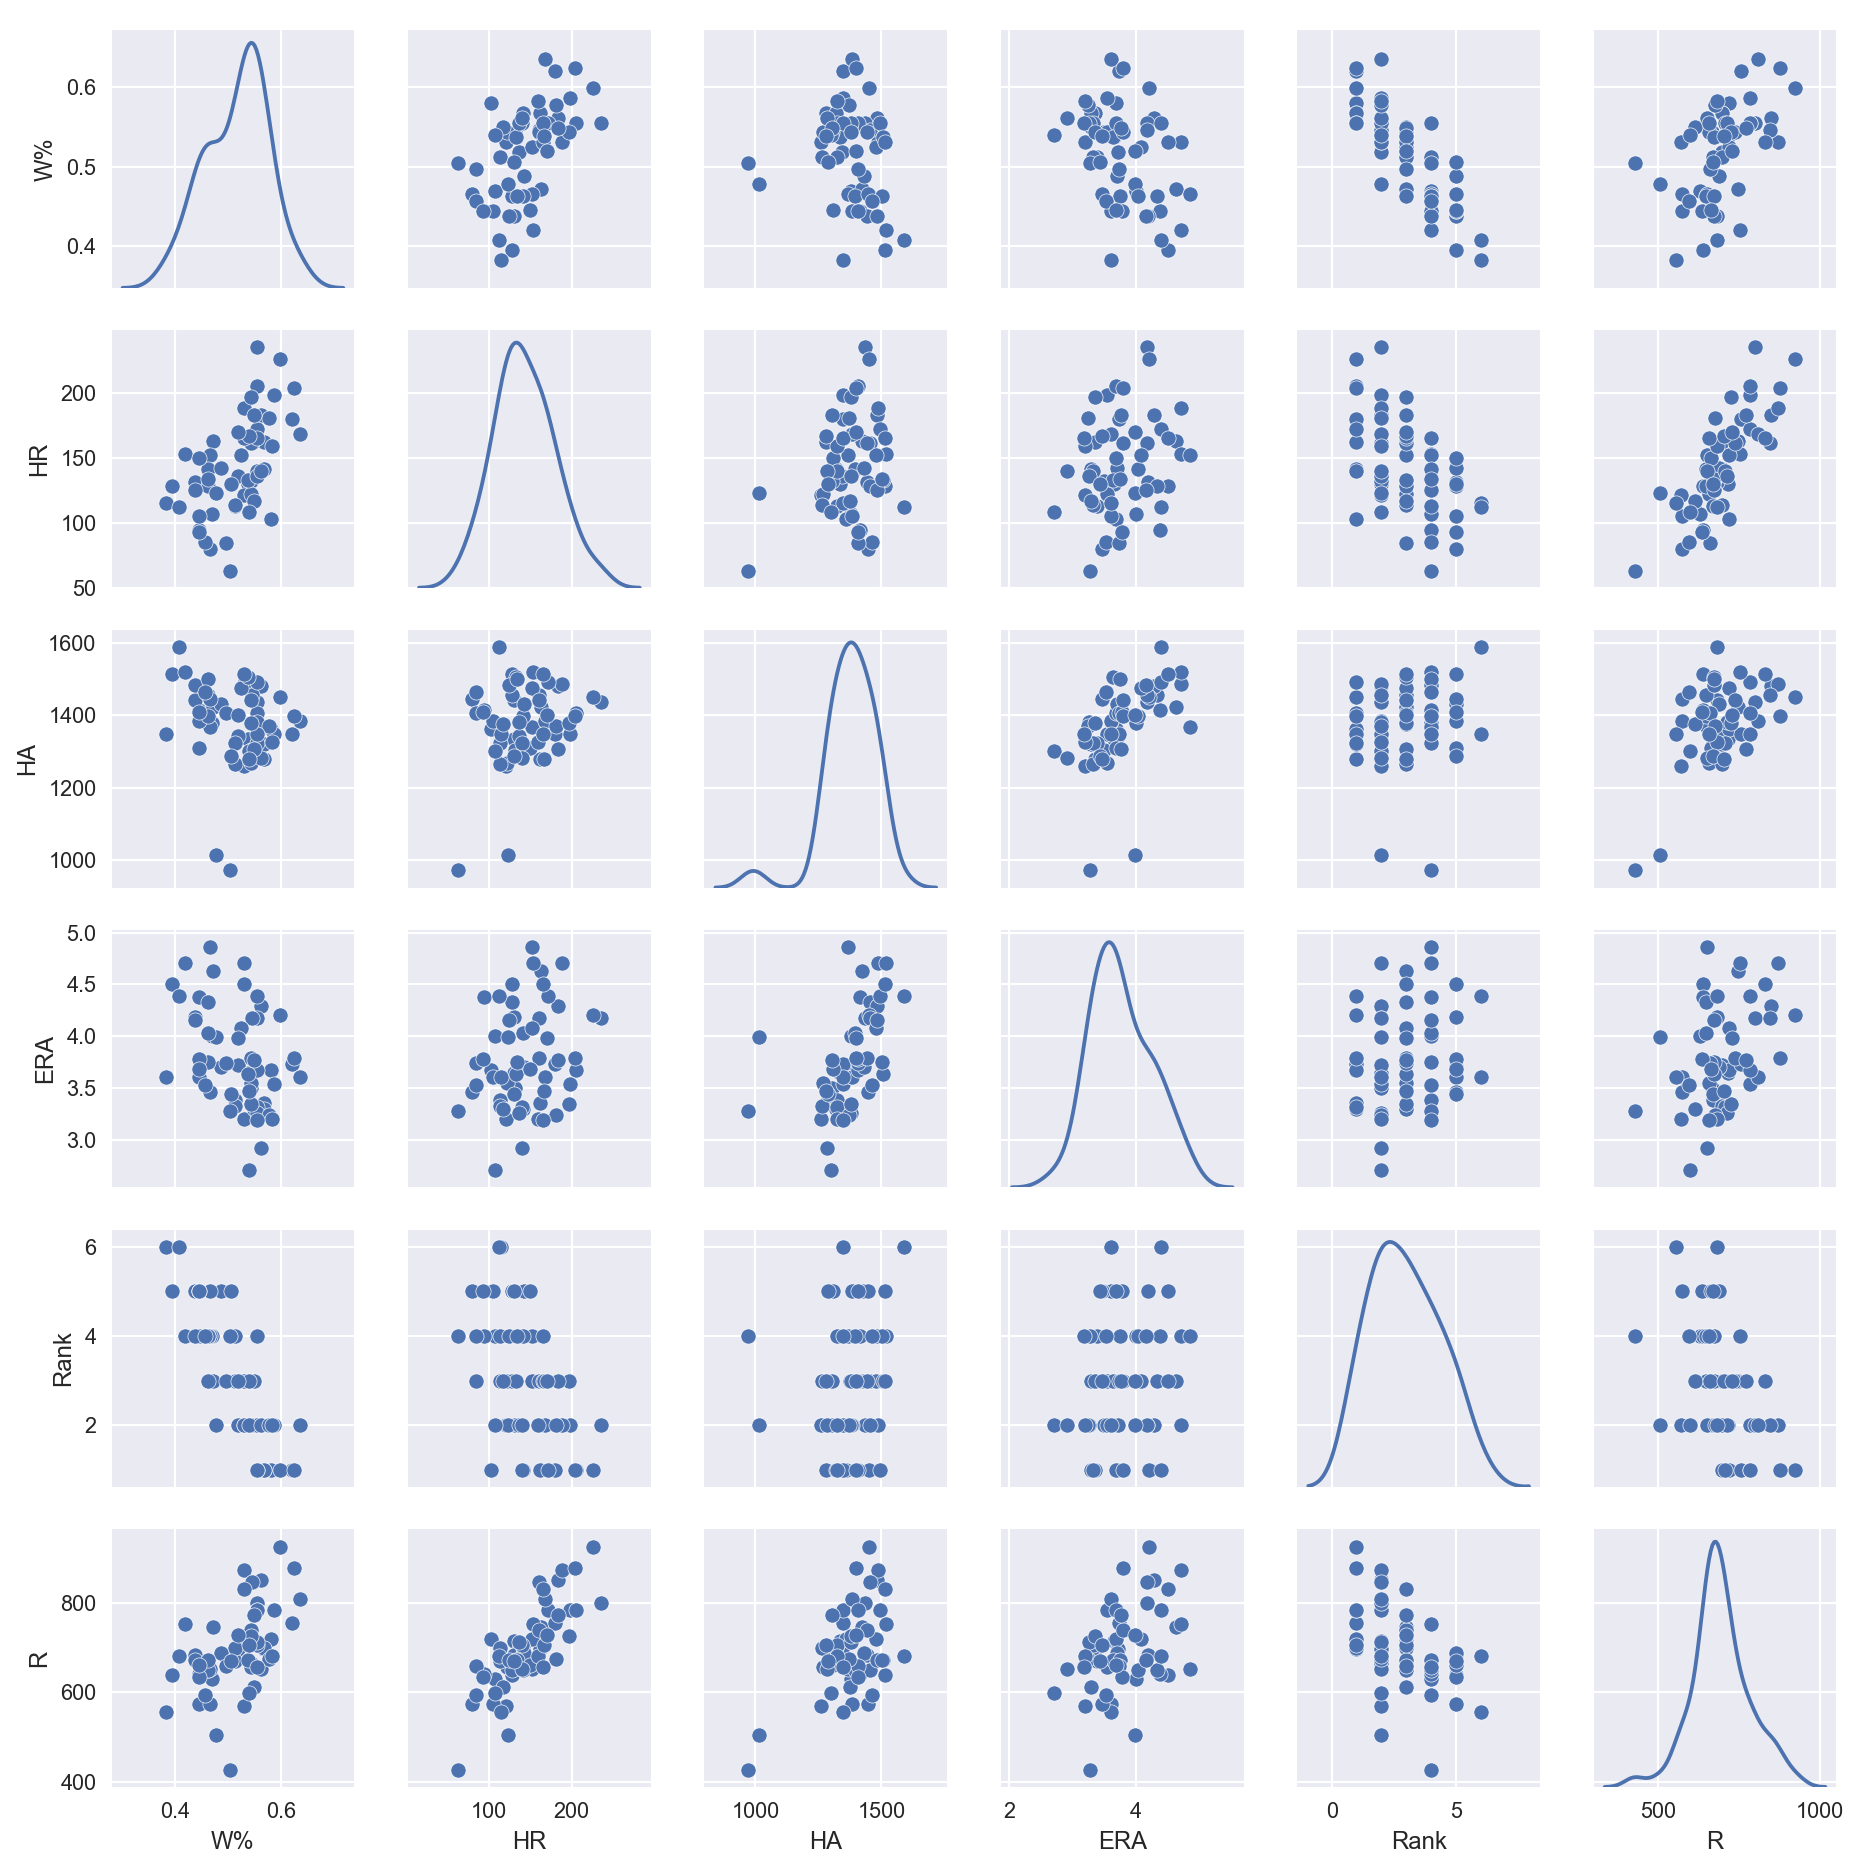

In [549]:
sns.pairplot(sfg, vars=['W%', 'HR', 'HA','ERA', 'Rank', 'R'], diag_kind='kde', size=2);